<a href="https://colab.research.google.com/github/sanaaria/Master-thesis/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [4]:
pip install ampligraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━

In [5]:
import ampligraph as ampligraph

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import ampligraph as ampligraph
from ampligraph.datasets import load_from_csv

In [7]:
# from ampligraph.evaluation import train_test_split_no_unseen,generate_corruptions_for_fit
# # from ampligraph.evaluation import train_test_split_no_unseen
from ampligraph.datasets import load_from_csv


In [8]:
# from ampligraph.evaluation import evaluate_performance
# As of version 1.1.1, Ampligraph removed the 'evaluate_performance' function and instead introduced the 'mrr_score', 'hits_at_k', and 'mean_rank' functions to calculate metrics for evaluating model performance.
# If you are using version 2.0.1, you should be able to use the 'mrr_score', 'hits_at_k', and 'mean_rank' functions to calculate the desired metrics. Here's an example of how you can do this
from ampligraph.evaluation import mrr_score

In [9]:
from ampligraph.evaluation import mrr_score, hits_at_n_score ,mr_score

In [10]:
# from ampligraph.evaluation.common import generate_corruptions
from ampligraph.latent_features.layers.corruption_generation import CorruptionGenerationLayerTrain

In [11]:
from ampligraph.latent_features.layers.scoring import ComplEx

In [12]:
from ampligraph.latent_features.layers.scoring import TransE

In [13]:
from ampligraph.latent_features.layers.scoring import DistMult

In [14]:
# from ampligraph.utils import save_model,restore_model
from ampligraph.utils import save_model
from ampligraph.utils import restore_model

In [15]:
from tensorflow.python.keras.models import Model

In [16]:
from tensorflow.python.keras.layers import Dense, Dropout

In [17]:
from keras.layers import LSTM, Lambda, Layer, Dropout

In [18]:
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,Adagrad,Adamax

In [19]:
from tensorflow import keras

In [20]:
#load data
################################################################

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#data example: yamanishi_08
dt_08 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/dt_all_08.txt',delimiter='\t',header=None)
# the script reads a csv file using pandas' read_csv function. This function reads the file from the specified path, which in this case is
# /content/drive/MyDrive/data/yamanishi_08/dt_all_08.txt.

dt_08.columns = ['head','relation','tail']
# the columns of the DataFrame dt_08 are set using the columns attribute. The column names are 'head', 'relation', and 'tail'.

In [25]:
dt_08.head()

,head,relation,tail
0,D00002,DRUG_TARGET,hsa:10
1,D00448,DRUG_TARGET,hsa:10
2,D00037,DRUG_TARGET,hsa:100
3,D00155,DRUG_TARGET,hsa:100
4,D00021,DRUG_TARGET,hsa:10056


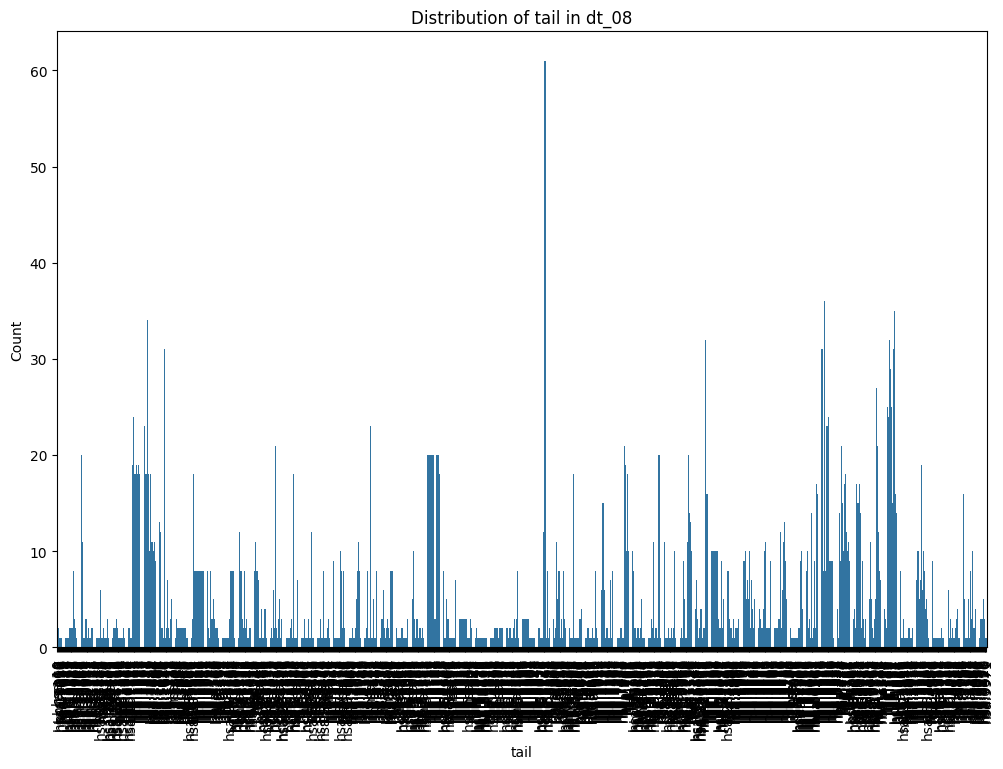

In [26]:
# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=dt_08, x='tail')
plt.xticks(rotation=90)
plt.title('Distribution of tail in dt_08')
plt.xlabel('tail')
plt.ylabel('Count')
plt.show()

In [29]:
print(dt_08['tail'].value_counts())

tail
hsa:5743     61
hsa:5742     61
hsa:6331     36
hsa:154      35
hsa:1576     34
             ..
hsa:51365     1
hsa:51601     1
hsa:51645     1
hsa:51727     1
hsa:9971      1
Name: count, Length: 989, dtype: int64


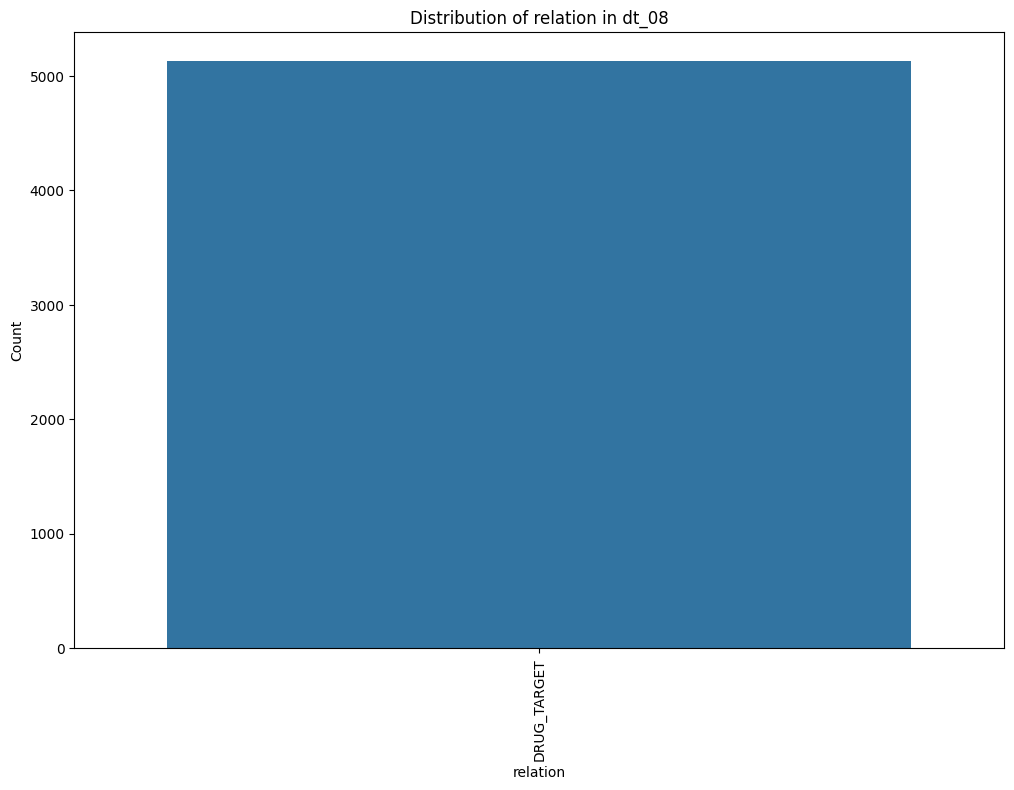

In [27]:
# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=dt_08, x='relation')
plt.xticks(rotation=90)
plt.title('Distribution of relation in dt_08')
plt.xlabel('relation')
plt.ylabel('Count')
plt.show()

In [22]:
#kg
# ##This code is written in Python using the pandas library.
# #The goal of this code is to load two text files,
# which contain Knowledge Graph (KG) data, and concatenate them into a single pandas DataFrame.
# The KG data in these text files consists of triples (head, relation, tail), which are essentially edges in a graph.
# The 'head' is the subject, the 'relation' is the predicate, and the 'tail' is the object.

kg1 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/kegg_kg.txt',delimiter='\t',header=None)
# The pd.read_csv() function reads the specified file and creates a DataFrame. The delimiter='\t' argument tells pandas to use tabs as separators.
# The header=None argument tells pandas that the first row of the file does not contain column names.

kg2 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/yamanishi_uniprot_kg.txt',delimiter='\t',header=None)
#This code is similar to the previous one.

kg = pd.concat([kg1,kg2])
#Concatenate the two DataFrames.
#The pd.concat() function concatenates the input DataFrames into a single DataFrame.

kg.index = range(len(kg))
#Reset the index of the concatenated DataFrame.
#The index attribute of a DataFrame represents the index of the rows.
#This line of code resets the index of the concatenated DataFrame so that it starts from 0 and increments by 1.

kg.columns = ['head','relation','tail']
#Set the column names of the concatenated DataFrame.
#This line of code assigns new column names to the concatenated DataFrame.


#The resulting kg DataFrame contains the combined KG data from both text files.
# The DataFrame has three columns: 'head', 'relation', and 'tail'. The rows represent the triples (head, relation, tail) in the KG.

In [24]:
print(kg.shape)

(95672, 3)


In [25]:
print(kg.dtypes)

head        object
relation    object
tail        object
dtype: object


In [26]:
print(kg['relation'].value_counts())

relation
BIOLOGICAL_PROCESS        12403
PATHWAY_GENE              10026
PATHWAY_DRUG               7093
GENE_PATHAWY               5551
CELL_COMPONENT             5199
MOLECULAR_FUNCTION         4875
INTERACT_WITH              4623
GENE_MOTIF                 4374
DRUG_BRITE                 3354
PROTEIN_PATHWAY            3189
PATHWAY_COMPOUND_DRUG      2972
DRUG_GROUP                 2714
PATHWAY_COMPOUND           2686
GENE_BRITE                 2572
DOMAIN                     2204
TYPE                       1966
DRUG_EFFICACY              1696
FAMILY                     1584
HOMOLOGOUS_SUPERFAMILY     1554
DRUG_TARGET_PATHWAY        1340
DRUG_ATC_C5                 902
DRUG_ATC_C4                 902
DRUG_ATC_C3                 894
DRUG_ATC_C2                 877
DRUG_PATHWAY_MAP            841
DRUG_ATC_C1                 823
PATHWAY_DISEASE             810
GENE_NETWORK                804
GENE_EC4                    753
GENE_DISEASE                709
DRUG_CLASS                  703

In [27]:
print(kg['head'].nunique())
print(kg['relation'].nunique())
print(kg['tail'].nunique())

3108
48
25226


In [28]:
# مثال بررسی ارتباط بین PROTEIN_PATHWAY و BIOLOGICAL_PROCESS
protein_pathways = kg[kg['relation'] == 'PROTEIN_PATHWAY']
biological_processes = kg[kg['relation'] == 'BIOLOGICAL_PROCESS']

# پیوندها یا همپوشانی‌ها را بررسی کنید
merged = pd.merge(protein_pathways, biological_processes, on='head', how='inner')
print(merged)


           head       relation_x         tail_x          relation_y  \
0      hsa:5834  PROTEIN_PATHWAY  R-HSA-6798695  BIOLOGICAL_PROCESS   
1      hsa:5834  PROTEIN_PATHWAY  R-HSA-6798695  BIOLOGICAL_PROCESS   
2      hsa:5834  PROTEIN_PATHWAY    R-HSA-70221  BIOLOGICAL_PROCESS   
3      hsa:5834  PROTEIN_PATHWAY    R-HSA-70221  BIOLOGICAL_PROCESS   
4      hsa:5914  PROTEIN_PATHWAY   R-HSA-383280  BIOLOGICAL_PROCESS   
...         ...              ...            ...                 ...   
76157  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76158  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76159  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76160  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   
76161  hsa:5091  PROTEIN_PATHWAY    R-HSA-70263  BIOLOGICAL_PROCESS   

           tail_y  
0      GO:0005980  
1      GO:0043312  
2      GO:0005980  
3      GO:0043312  
4      GO:0043277  
...           ...  
76157  

In [29]:
print(kg.isnull().sum())

head        0
relation    0
tail        0
dtype: int64


In [30]:
print(kg.describe())

            head            relation       tail
count      95672               95672      95672
unique      3108                  48      25226
top     hsa04080  BIOLOGICAL_PROCESS  KEGG_GENE
freq        2314               12403        989


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# # نمودار توزیع برای نوع داده‌ها
# sns.countplot(data=kg, x='relation')
# plt.xticks(rotation=90)
# plt.show()


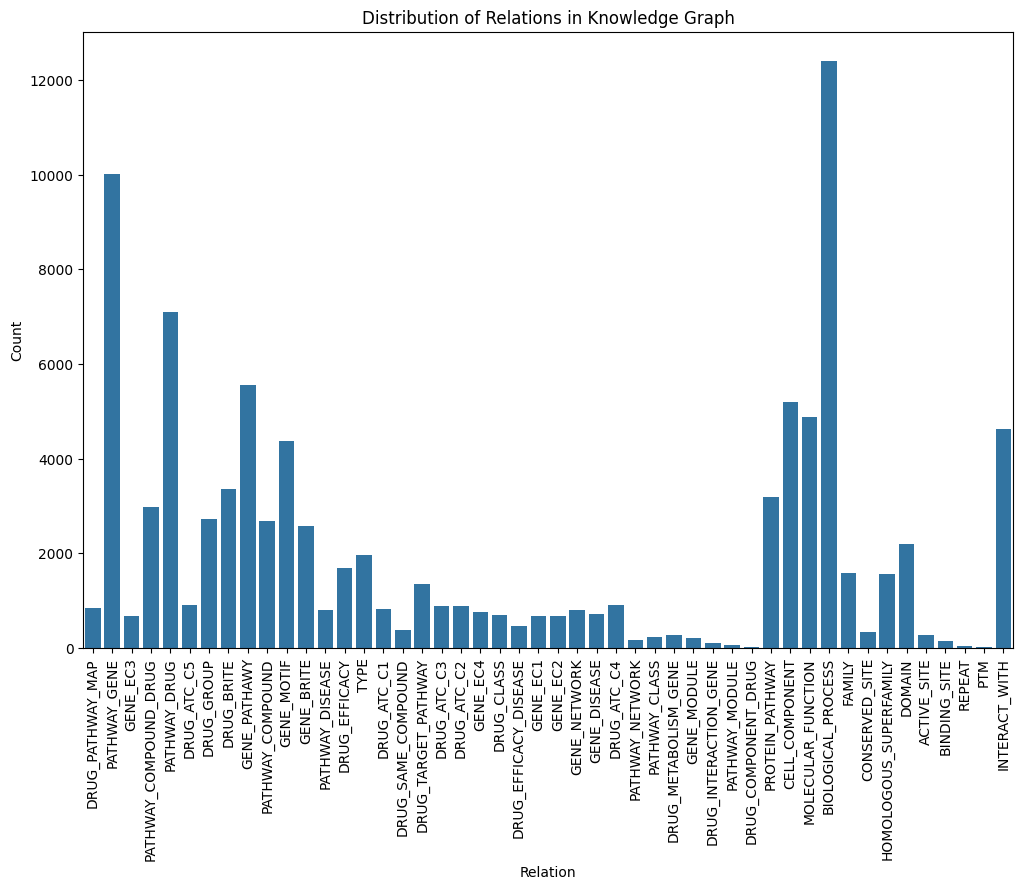

In [32]:
# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=kg, x='relation')
plt.xticks(rotation=90)
plt.title('Distribution of Relations in Knowledge Graph')
plt.xlabel('Relation')
plt.ylabel('Count')
plt.show()

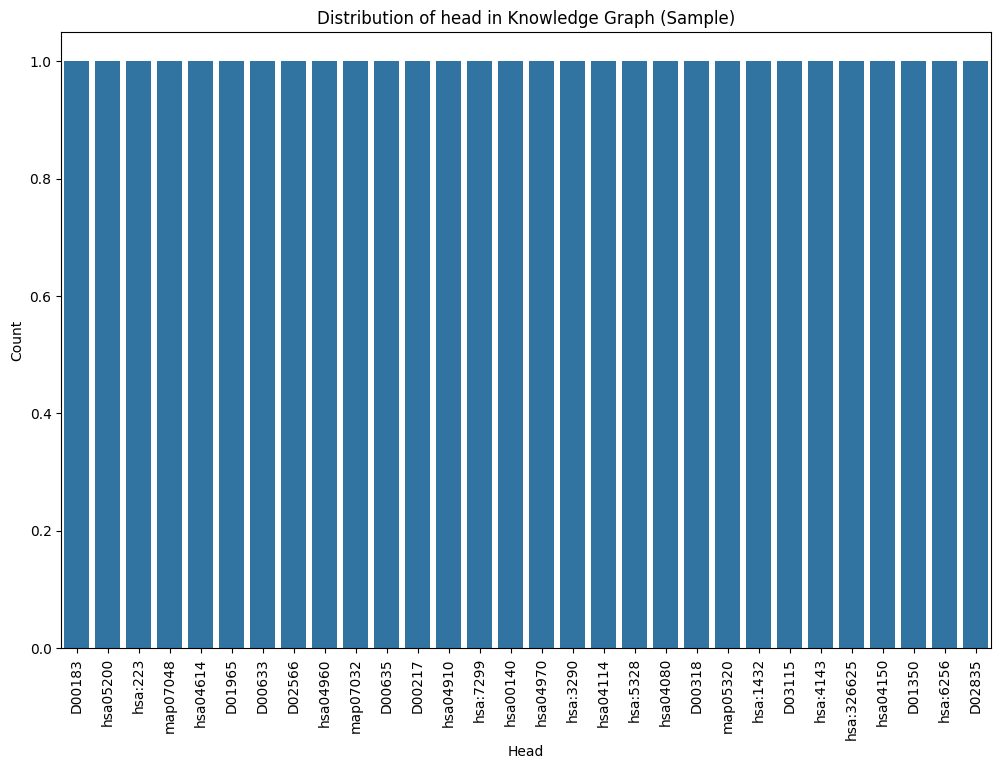

In [33]:
# انتخاب نمونه‌ای کوچک از داده‌ها
kg_sample = kg.head(30)  # انتخاب 20 ردیف اول

# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=kg_sample, x='head')
plt.xticks(rotation=90)
plt.title('Distribution of head in Knowledge Graph (Sample)')
plt.xlabel('Head')
plt.ylabel('Count')
plt.show()

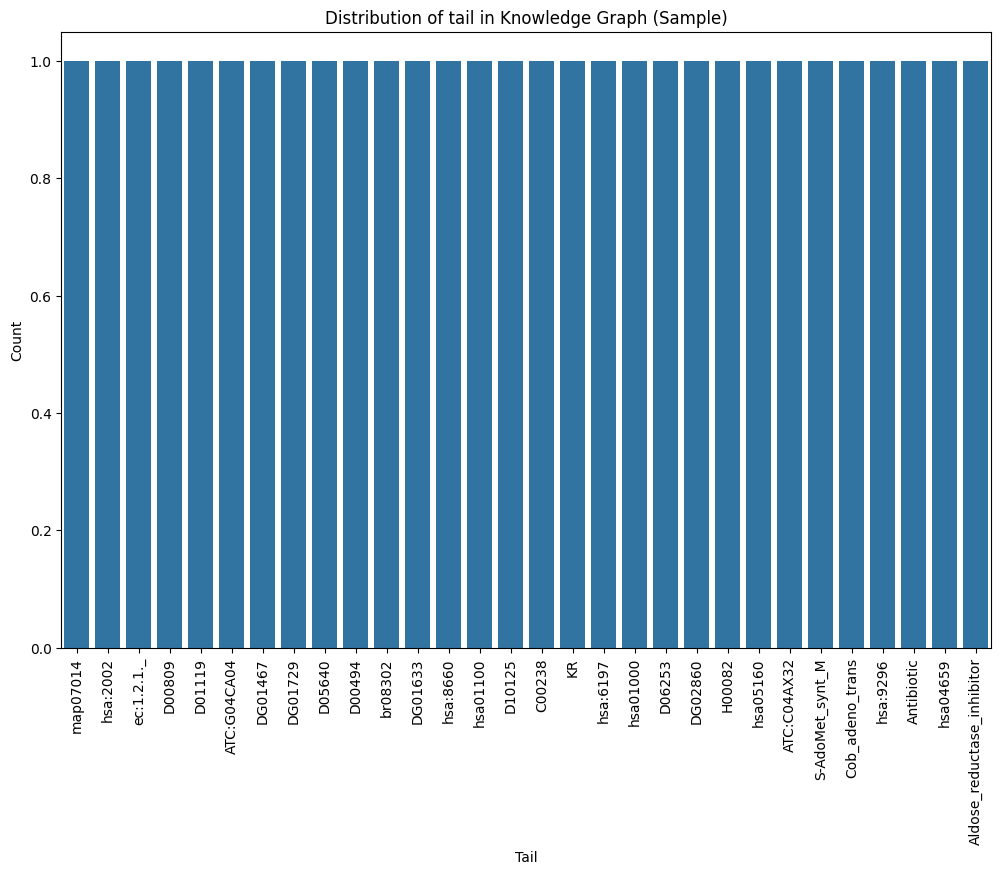

In [34]:
# انتخاب نمونه‌ای کوچک از داده‌ها
kg_sample = kg.head(30)  # انتخاب 20 ردیف اول

# نمودار توزیع برای نوع داده‌ها
plt.figure(figsize=(12, 8))
sns.countplot(data=kg_sample, x='tail')
plt.xticks(rotation=90)
plt.title('Distribution of tail in Knowledge Graph (Sample)')
plt.xlabel('Tail')
plt.ylabel('Count')
plt.show()

In [35]:
print(kg.head(30))

          head               relation                        tail
0       D00183       DRUG_PATHWAY_MAP                    map07014
1     hsa05200           PATHWAY_GENE                    hsa:2002
2      hsa:223               GENE_EC3                  ec:1.2.1._
3     map07048  PATHWAY_COMPOUND_DRUG                      D00809
4     hsa04614           PATHWAY_DRUG                      D01119
5       D01965            DRUG_ATC_C5                 ATC:G04CA04
6       D00633             DRUG_GROUP                     DG01467
7       D02566             DRUG_GROUP                     DG01729
8     hsa04960           PATHWAY_DRUG                      D05640
9     map07032  PATHWAY_COMPOUND_DRUG                      D00494
10      D00635             DRUG_BRITE                     br08302
11      D00217             DRUG_GROUP                     DG01633
12    hsa04910           PATHWAY_GENE                    hsa:8660
13    hsa:7299           GENE_PATHAWY                    hsa01100
14    hsa0

In [36]:
# print("kg1:")
# print(kg1['relation'].value_counts())
# print("kg2:")
# print(kg2['relation'].value_counts())


In [23]:
pip install networkx matplotlib


In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# # بارگذاری داده‌ها
# #kg1 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/kegg_kg.txt', delimiter='\t', header=None)
# #kg2 = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/kg_data/yamanishi_uniprot_kg.txt', delimiter='\t', header=None)
# #kg = pd.concat([kg1, kg2])
# kg.index = range(len(kg))
# #kg.columns = ['head', 'relation', 'tail']

# # ساخت گراف
# G = nx.MultiDiGraph()  # استفاده از MultiDiGraph برای پشتیبانی از چندین لبه با ویژگی‌های مشابه

# # افزودن گره‌ها و لبه‌ها به گراف
# for index, row in kg.iterrows():
#     G.add_edge(row['head'], row['tail'], relation=row['relation'])

# # رسم گراف
# pos = nx.spring_layout(G, seed=42)  # موقعیت‌یابی گره‌ها
# plt.figure(figsize=(50, 50))  # اندازه تصویر

# # رسم گره‌ها
# nx.draw_networkx_nodes(G, pos, node_size=500)
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")

# # رسم برچسب‌ها
# edge_labels = nx.get_edge_attributes(G, 'relation')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# plt.title('Knowledge Graph Visualization')
# plt.show()


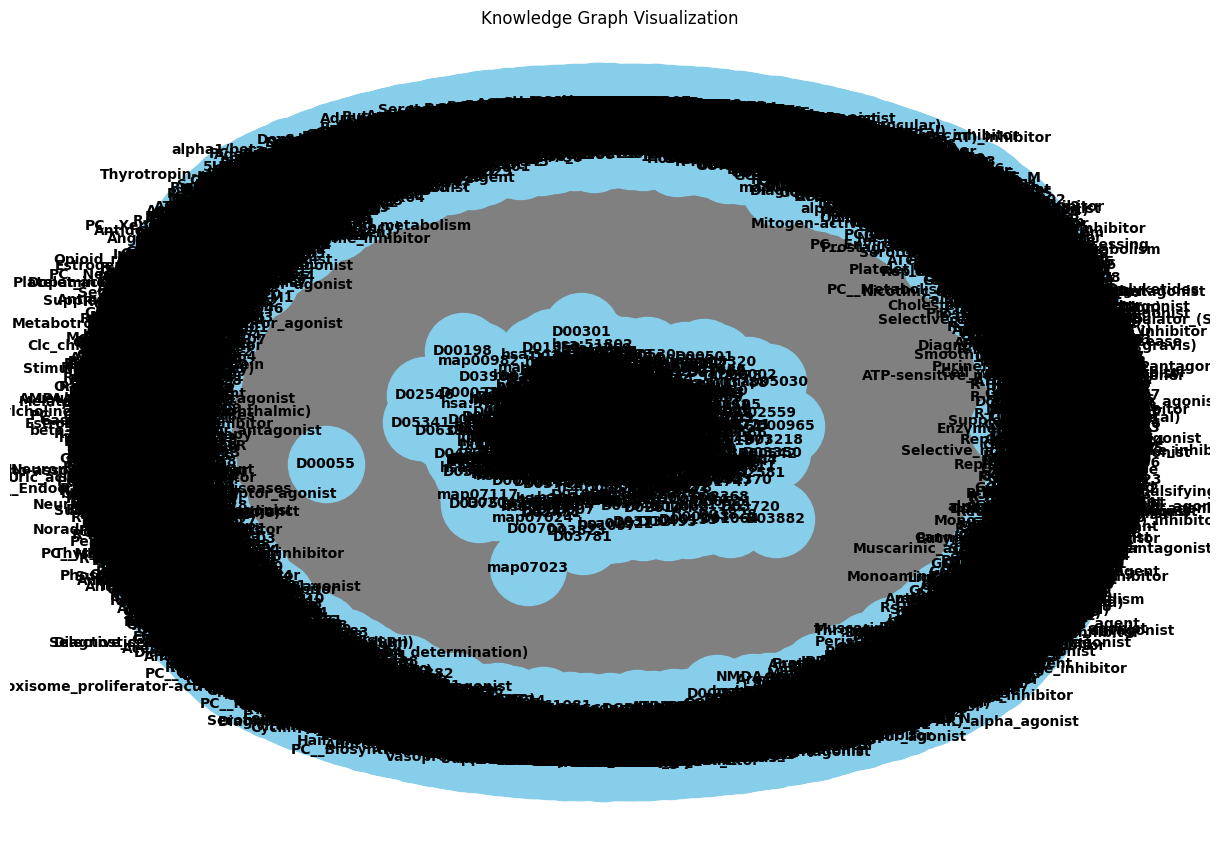

In [39]:
# ایجاد گراف
G = nx.from_pandas_edgelist(kg, 'head', 'tail', edge_attr=True, create_using=nx.DiGraph())

# رسم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # تعیین موقعیت نودها
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title('Knowledge Graph Visualization')
plt.show()

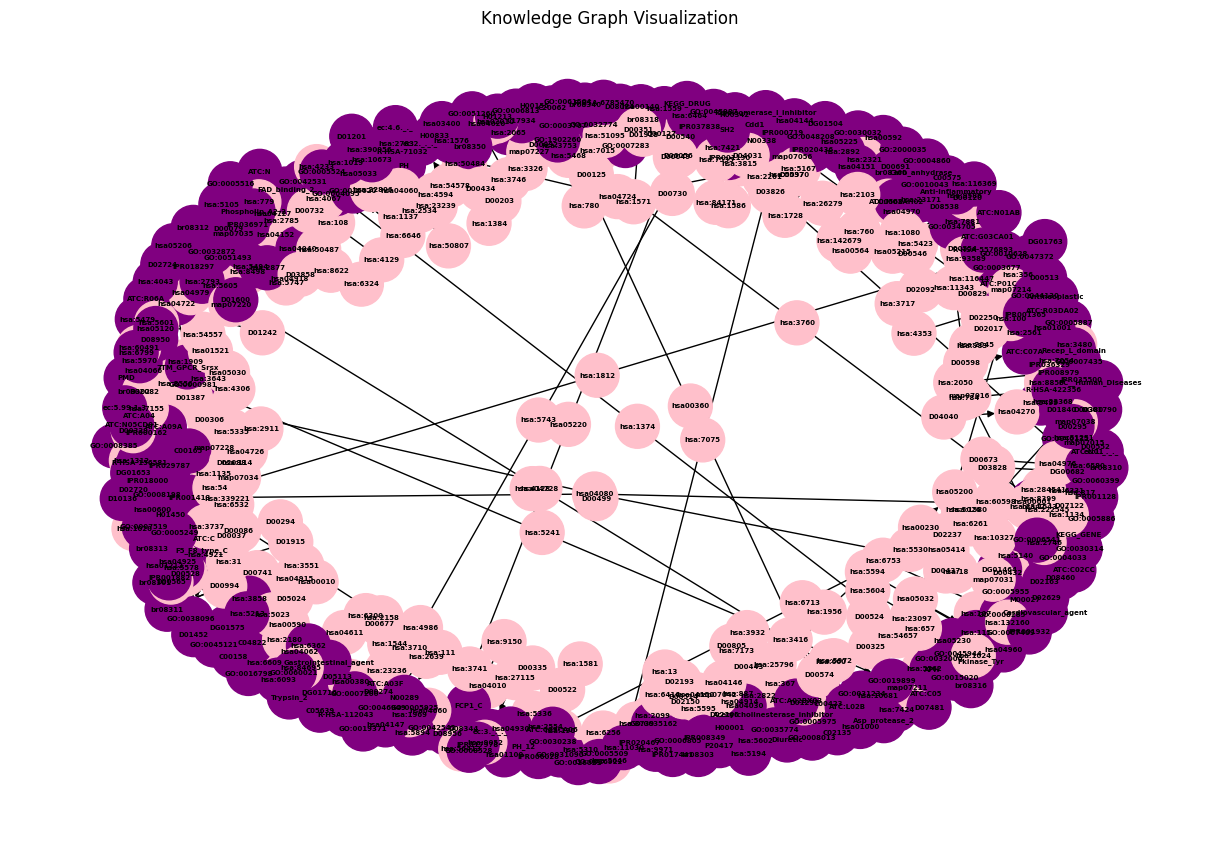

In [40]:
# انتخاب یک نمونه کوچک از داده‌ها برای رسم گراف واضح‌تر
kg_sample = kg.sample(n=300, random_state=42)  # انتخاب 50 نمونه تصادفی

# ایجاد گراف
G = nx.from_pandas_edgelist(kg_sample, 'head', 'tail', edge_attr=True, create_using=nx.DiGraph())

# تعیین رنگ‌ها برای نودها
node_colors = []
for node in G.nodes():
    if node in kg_sample['head'].values:
        node_colors.append('pink')
    else:
        node_colors.append('purple')

# رسم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # تعیین موقعیت نودها
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=5, font_weight="bold", edge_color="black")
plt.title('Knowledge Graph Visualization')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# اولین دو خط، دو شیء LabelEncoder را ایجاد می‌کند.
# این اشیاء برای تبدیل متغیرهای دسته‌ای به یک فرمت عددی که برای الگوریتم‌های یادگیری ماشین قابل فهم باشد، استفاده می‌شوند.
# تابع LabelEncoder() دو بار فراخوانی می‌شود تا دو شیء head_le و tail_le ایجاد شوند.
head_le = LabelEncoder()
tail_le = LabelEncoder()
relation_le=LabelEncoder()
# متد fit() بر روی هر دو شیء فراخوانی می‌شود. این متد پارامترهای لازم برای انجام رمزگذاری را محاسبه می‌کند.
head_le.fit(dt_08['head'].values)
tail_le.fit(dt_08['tail'].values)
relation_le.fit(dt_08['relation'].values)
# MinMaxScaler از ماژول preprocessing کتابخانه sklearn وارد می‌شود. این برای مقیاس‌بندی داده‌ها استفاده می‌شود.
mms = MinMaxScaler(feature_range=(0, 1))


In [28]:
dt_08['head'] = head_le.transform(dt_08['head'].values)
dt_08['tail'] = tail_le.transform(dt_08['tail'].values)
dt_08['relation']=relation_le.transform(dt_08['relation'].values)
print("نتیجه‌ی Label Encoding:")
print(dt_08)

نتیجه‌ی Label Encoding:
      head  relation  tail
0        0         0     0
1      181         0     0
2       11         0     1
3       60         0     1
4        5         0     3
...    ...       ...   ...
5122    55         0   943
5123    79         0   943
5124   335         0   943
5125   210         0   986
5126    63         0   987

[5127 rows x 3 columns]


In [29]:
dt_08 = mms.fit_transform(dt_08)
print("\nنتیجه‌ی مقیاس‌بندی با MinMaxScaler:")
print(dt_08)


نتیجه‌ی مقیاس‌بندی با MinMaxScaler:
[[0.         0.         0.        ]
 [0.22911392 0.         0.        ]
 [0.01392405 0.         0.00101215]
 ...
 [0.42405063 0.         0.95445344]
 [0.26582278 0.         0.99797571]
 [0.07974684 0.         0.99898785]]


In [30]:
#فراخوانی شناسه داروها (Drug IDs):
fp_id = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/791drug_struc.csv')['drug_id']

# فراخوانی شناسه پروتئین‌ها و توالی‌های آنها:
df_proseq = pd.read_csv('/content/drive/MyDrive/data/yamanishi_08/989proseq.csv')
df_proseq.columns = ['pro_id','pro_ids','seq']

# استخراج شناسه پروتئین‌ها:
pro_id = df_proseq['pro_id']

#فراخوانی ویژگی‌های داروها:
drug_feats = np.loadtxt('/content/drive/MyDrive/data/yamanishi_08/morganfp.txt',delimiter=',')

#فراخوانی ویژگی‌های پروتئین‌ها:
pro_feats = np.loadtxt('/content/drive/MyDrive/data/yamanishi_08/pro_ctd.txt',delimiter=',')

#مقیاس‌بندی ویژگی‌های پروتئین‌ها:
pro_feats_scaled = mms.fit_transform(pro_feats)

# کاهش ابعاد ویژگی‌های پروتئین با استفاده از PCA:
pro_feats_scaled2 = PCA(n_components=100).fit_transform(pro_feats_scaled)

#دوباره مقیاس‌بندی ویژگی‌های کاهش‌یافته:
pro_feats_scaled3 = mms.fit_transform(pro_feats_scaled2)

# ترکیب شناسه‌های داروها با ویژگی‌های آنها:
fp_df = pd.concat([fp_id,pd.DataFrame(drug_feats)],axis=1)

#ترکیب شناسه‌های پروتئین‌ها با ویژگی‌های آنها:
prodes_df = pd.concat([pro_id,pd.DataFrame(pro_feats_scaled3)],axis=1)


In [30]:
fp_df

,drug_id,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,D00448,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D00037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,D00155,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,D00021,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D01441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,D01994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787,D02250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
788,D01925,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
789,D02007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
fp_df.shape

(791, 1025)

In [31]:
prodes_df

,pro_id,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,hsa:10,0.492745,0.378991,0.247887,0.365602,0.362159,0.338746,0.646155,0.436877,0.531654,...,0.501608,0.595851,0.410985,0.420385,0.617152,0.404232,0.480991,0.418391,0.395501,1.000000
1,hsa:100,0.506456,0.429743,0.369211,0.339106,0.604534,0.454493,0.571485,0.464988,0.494835,...,0.392878,0.471332,0.319760,0.359305,0.520698,0.556240,0.481626,0.535750,0.439570,0.420495
2,hsa:10056,0.630732,0.457383,0.328126,0.297027,0.400041,0.434246,0.522574,0.401249,0.533447,...,0.472987,0.355020,0.354466,0.331146,0.562912,0.485158,0.525421,0.465790,0.554232,0.221508
3,hsa:1017,0.591641,0.493375,0.197547,0.456034,0.346906,0.571221,0.594414,0.437832,0.486730,...,0.332257,0.601323,0.259936,0.447665,0.852123,0.422841,0.422340,0.446488,0.407554,0.173704
4,hsa:1018,0.635572,0.494294,0.218801,0.486494,0.423561,0.509730,0.520542,0.425348,0.493557,...,0.438368,0.820290,0.053606,0.081671,0.994308,0.460074,0.891151,0.597091,0.709698,0.694107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,hsa:6258,0.261174,0.118060,0.586731,0.143549,0.597086,0.457323,0.308693,0.644995,0.589421,...,0.446128,0.614660,0.503725,0.564129,0.298087,0.825357,0.984020,0.263335,0.390805,0.513894
985,hsa:7421,0.597342,0.359272,0.514434,0.338436,0.475229,0.424243,0.256786,0.320957,0.633523,...,0.311740,0.359979,0.371724,0.447654,0.704197,0.405869,0.545544,0.423672,0.306278,0.351960
986,hsa:8856,0.665030,0.269994,0.397028,0.358848,0.356381,0.368617,0.331813,0.434374,0.455211,...,0.227831,0.264780,0.377238,0.296707,0.634508,0.362739,0.403053,0.448674,0.288337,0.483137
987,hsa:9970,0.446068,0.312869,0.403411,0.324297,0.452120,0.164923,0.366328,0.422195,0.416573,...,0.509153,0.731506,0.388026,0.512060,0.645682,0.467354,0.157337,0.599400,0.471353,0.591879


In [32]:
drug_feats

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
drug_feats.shape

(791, 1024)

In [33]:
pro_feats

array([[  0.262,   0.483,   0.255, ...,  47.586,  75.172, 100.   ],
       [  0.303,   0.446,   0.251, ...,  45.455,  71.35 , 100.   ],
       [  0.29 ,   0.463,   0.246, ...,  49.066,  76.231, 100.   ],
       ...,
       [  0.272,   0.435,   0.293, ...,  55.991,  76.728,  99.309],
       [  0.267,   0.483,   0.25 , ...,  51.705,  72.727,  99.716],
       [  0.253,   0.471,   0.276, ...,  54.938,  78.189,  99.794]])

In [34]:
pro_feats.shape

(989, 147)

In [40]:
data_path = '/content/drive/MyDrive/data/yamanishi_08/data_folds/warm_start_1_10'


def load_data(i):
    # Read the train_fold csv file. The label is included.
    train = pd.read_csv(data_path+'/train_fold_'+str(i+1)+'.csv')[['head','relation','tail','label']]

    # Select only the positive examples (label == 1) from the train set.
    train_pos = train[train['label']==1]

    # Read the test_fold csv file. The label is included.
    test = pd.read_csv(data_path+'/test_fold_'+str(i+1)+'.csv')[['head','relation','tail','label']]

    # Merge the positive train examples and the knowledge graph into a single dataframe.
    data = pd.concat([train_pos,kg])[['head','relation','tail']]


    # Return the train, train_pos, test, and data dataframes.
    return train,train_pos,test,data



In [33]:
load_data(1)[0]

,head,relation,tail,label
0,D00002,DRUG_TARGET,hsa:10,1.0
1,D00448,DRUG_TARGET,hsa:10,1.0
2,D00037,DRUG_TARGET,hsa:100,1.0
3,D00155,DRUG_TARGET,hsa:100,1.0
4,D00021,DRUG_TARGET,hsa:10056,1.0
...,...,...,...,...
44830,D01132,DRUG_TARGET,hsa:886,0.0
44831,D01132,DRUG_TARGET,hsa:6898,0.0
44832,D01132,DRUG_TARGET,hsa:1374,0.0
44833,D01132,DRUG_TARGET,hsa:114,0.0


In [34]:
load_data(1)[1]

,head,relation,tail,label
0,D00002,DRUG_TARGET,hsa:10,1.0
1,D00448,DRUG_TARGET,hsa:10,1.0
2,D00037,DRUG_TARGET,hsa:100,1.0
3,D00155,DRUG_TARGET,hsa:100,1.0
4,D00021,DRUG_TARGET,hsa:10056,1.0
...,...,...,...,...
4610,D00180,DRUG_TARGET,hsa:5739,1.0
4611,D00105,DRUG_TARGET,hsa:2100,1.0
4612,D00327,DRUG_TARGET,hsa:367,1.0
4613,D00316,DRUG_TARGET,hsa:6257,1.0


In [35]:
load_data(1)[2]

,head,relation,tail,label
0,D00043,DRUG_TARGET,hsa:10279,1.0
1,D02323,DRUG_TARGET,hsa:10327,1.0
2,D00160,DRUG_TARGET,hsa:10747,1.0
3,D00528,DRUG_TARGET,hsa:10846,1.0
4,D02042,DRUG_TARGET,hsa:10846,1.0
...,...,...,...,...
5529,D00316,DRUG_TARGET,hsa:778,0.0
5530,D00316,DRUG_TARGET,hsa:759,0.0
5531,D00316,DRUG_TARGET,hsa:10269,0.0
5532,D00316,DRUG_TARGET,hsa:10188,0.0


In [42]:
load_data(1)[3]

,head,relation,tail
0,D00002,DRUG_TARGET,hsa:10
1,D00448,DRUG_TARGET,hsa:10
2,D00037,DRUG_TARGET,hsa:100
3,D00155,DRUG_TARGET,hsa:100
4,D00021,DRUG_TARGET,hsa:10056
...,...,...,...
95667,hsa:5800,INTERACT_WITH,hsa:7010
95668,hsa:5777,INTERACT_WITH,hsa:3932
95669,hsa:5777,INTERACT_WITH,hsa:5747
95670,hsa:5777,INTERACT_WITH,hsa:6098


No charts were generated by quickchart


In [43]:
load_data_1_3=load_data(1)[3]

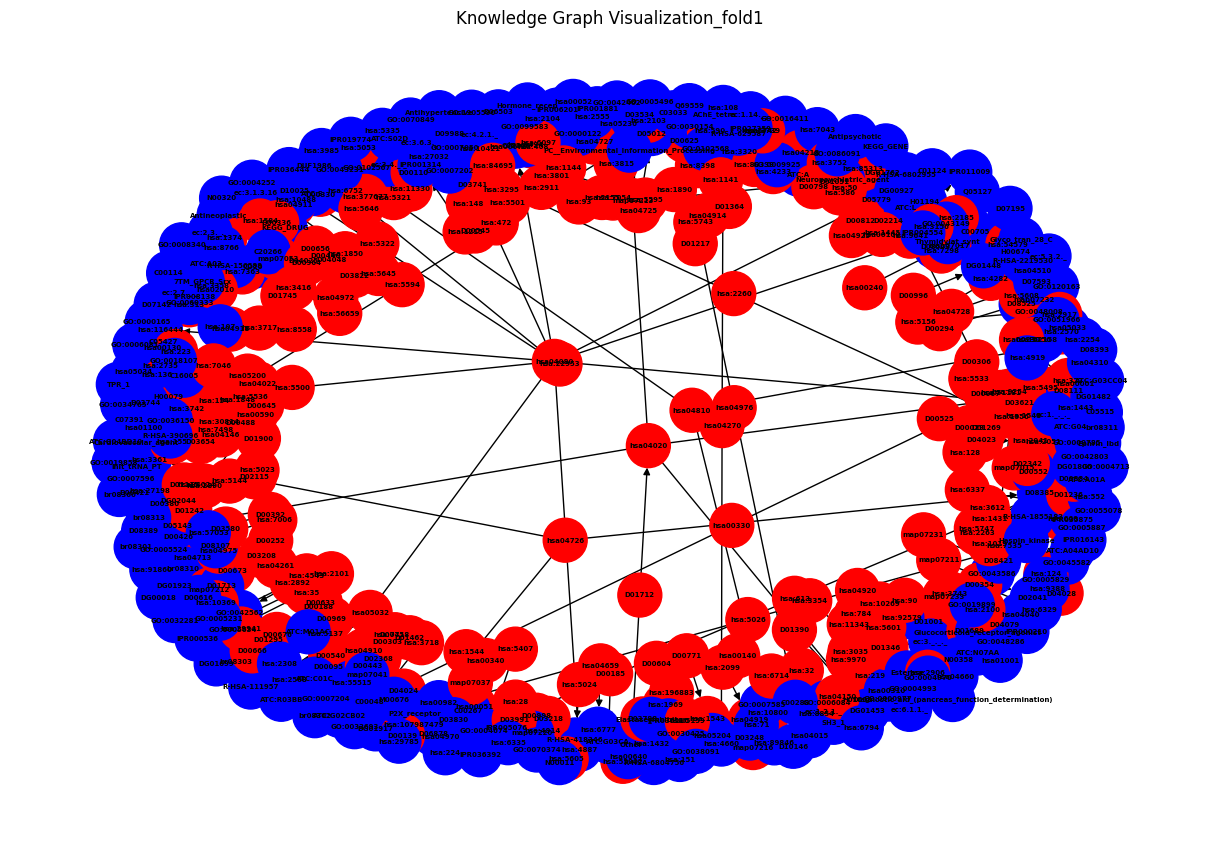

In [45]:
# انتخاب یک نمونه کوچک از داده‌ها برای رسم گراف واضح‌تر
kg_sample = load_data_1_3.sample(n=300, random_state=42)  # انتخاب 50 نمونه تصادفی

# ایجاد گراف
G = nx.from_pandas_edgelist(kg_sample, 'head', 'tail', edge_attr=True, create_using=nx.DiGraph())

# تعیین رنگ‌ها برای نودها
node_colors = []
for node in G.nodes():
    if node in kg_sample['head'].values:
        node_colors.append('red')
    else:
        node_colors.append('blue')

# رسم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # تعیین موقعیت نودها
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=5, font_weight="bold", edge_color="black")
plt.title('Knowledge Graph Visualization_fold1')
plt.show()

In [47]:
load_data_2_3=load_data(2)[3]

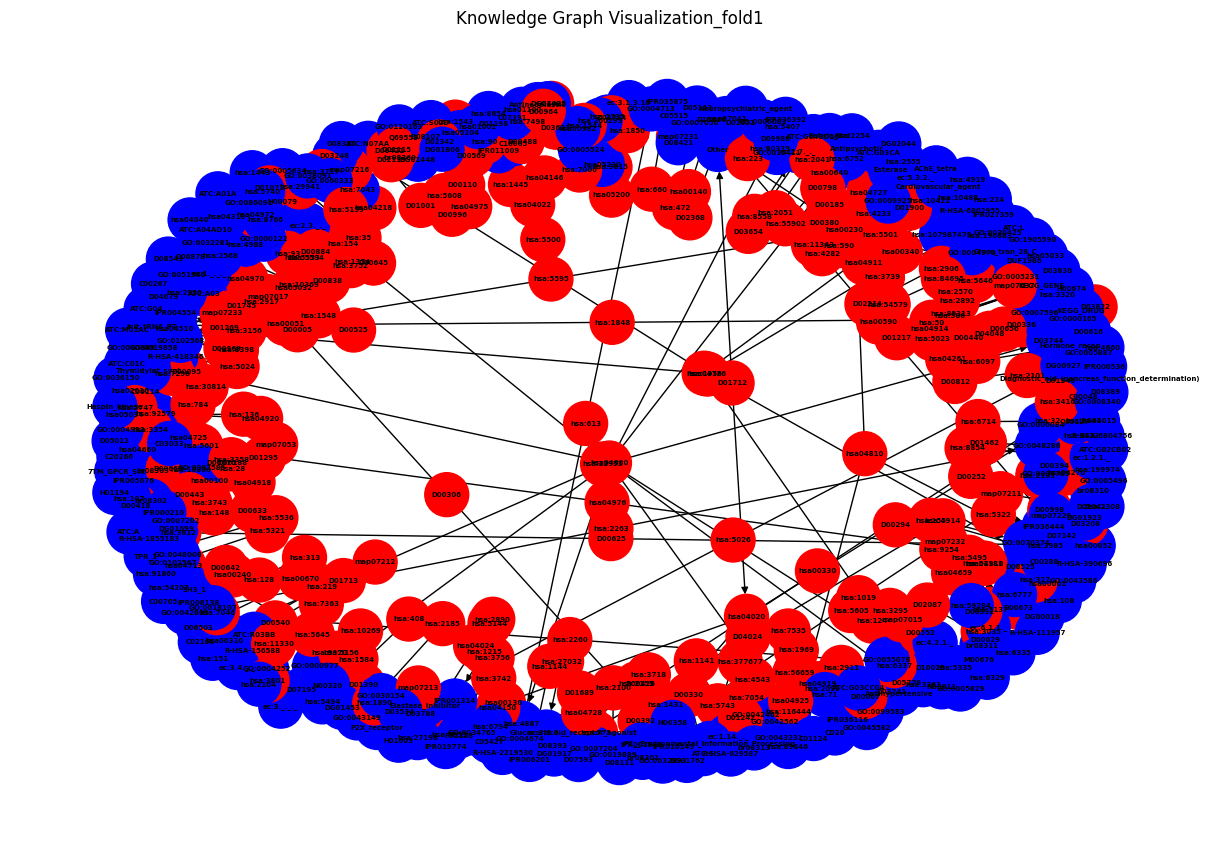

In [48]:
# انتخاب یک نمونه کوچک از داده‌ها برای رسم گراف واضح‌تر
kg_sample = load_data_2_3.sample(n=300, random_state=42)  # انتخاب 50 نمونه تصادفی

# ایجاد گراف
G = nx.from_pandas_edgelist(kg_sample, 'head', 'tail', edge_attr=True, create_using=nx.DiGraph())

# تعیین رنگ‌ها برای نودها
node_colors = []
for node in G.nodes():
    if node in kg_sample['head'].values:
        node_colors.append('red')
    else:
        node_colors.append('blue')

# رسم گراف
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # تعیین موقعیت نودها
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=5, font_weight="bold", edge_color="black")
plt.title('Knowledge Graph Visualization_fold1')
plt.show()